<a href="https://colab.research.google.com/github/AhsanKhodami/AhsanKhodami/blob/main/SingelCase_Formula_and_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

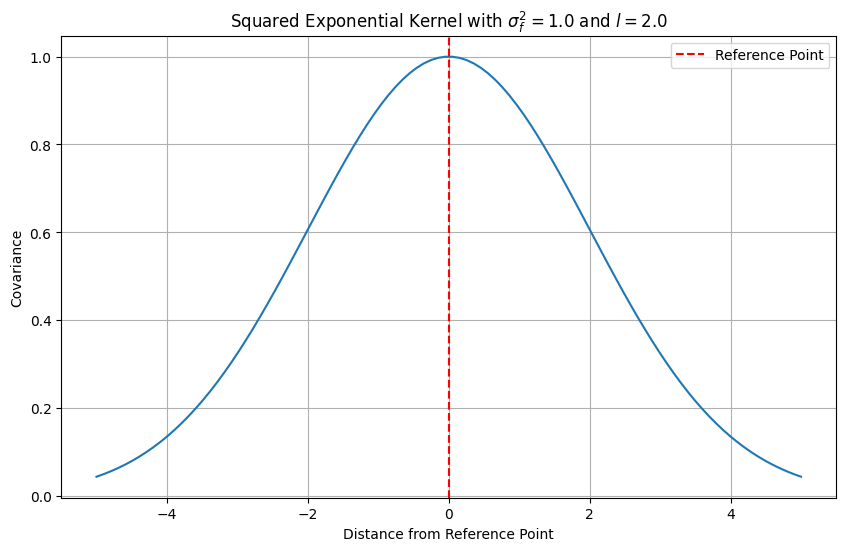

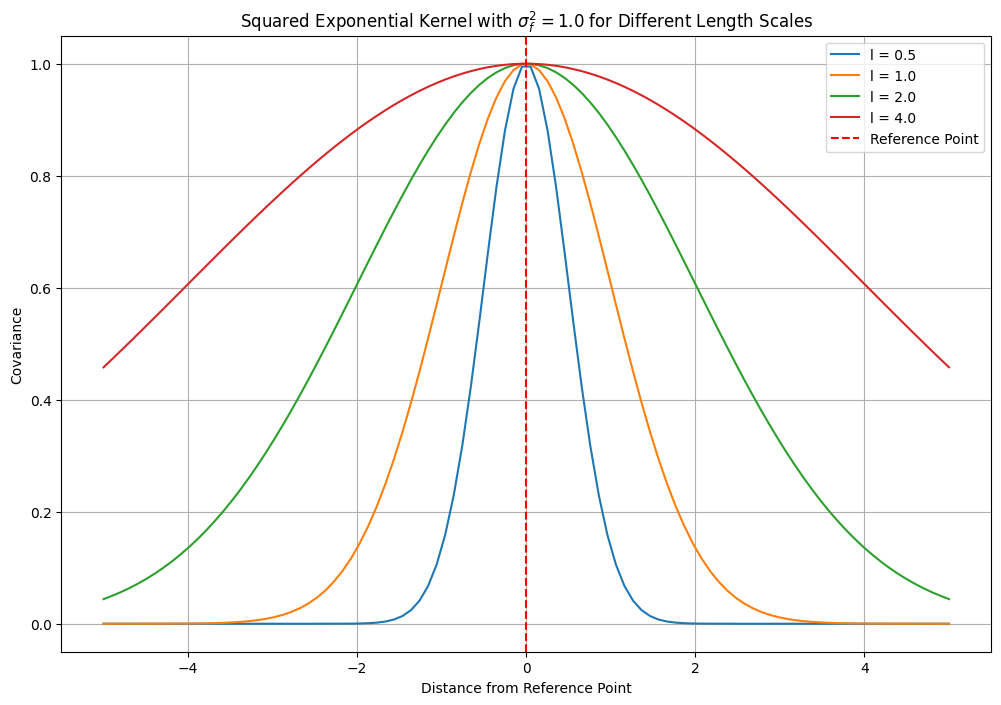

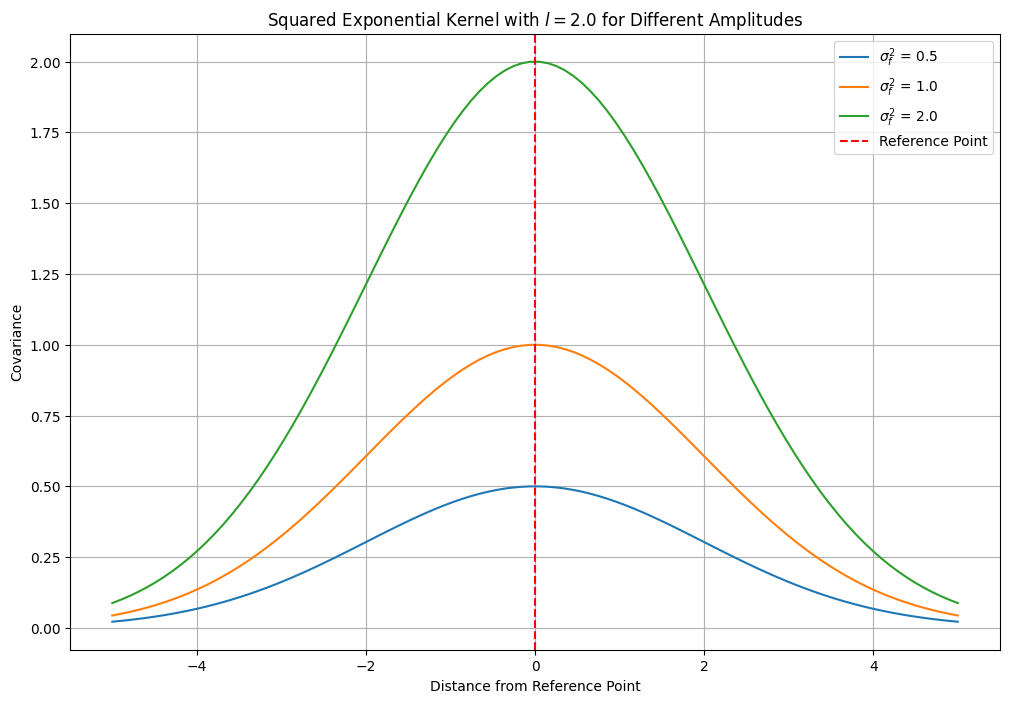

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def squared_exponential_kernel(x1, x2, sigma_f_sq, l):
  """
  Calculates the squared exponential (SE) kernel between two input vectors.

  Args:
    x1 (numpy.ndarray): First input vector.
    x2 (numpy.ndarray): Second input vector.
    sigma_f_sq (float): Amplitude (signal variance) parameter (sigma_f^2).
    l (float): Length scale parameter.

  Returns:
    float: The kernel value between x1 and x2.
  """
  squared_distance = np.sum((x1 - x2)**2)
  return sigma_f_sq * np.exp(-squared_distance / (2 * l**2))

# --- Plotting the kernel's behavior ---

# Define the parameters
sigma_f_squared = 1.0
length_scale = 2.0

# Choose a reference point (let's assume a 1D input for easy plotting)
reference_point = np.array([0.0])

# Generate a range of test points around the reference point
test_points = np.linspace(-5, 5, 100).reshape(-1, 1) # Reshape for vector subtraction

# Calculate the covariance between the reference point and all test points
covariance_values = np.array([squared_exponential_kernel(reference_point, tp, sigma_f_squared, length_scale) for tp in test_points])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(test_points, covariance_values)
plt.title(f'Squared Exponential Kernel with $\sigma_f^2 = {sigma_f_squared}$ and $l = {length_scale}$')
plt.xlabel('Distance from Reference Point')
plt.ylabel('Covariance')
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--', label='Reference Point')
plt.legend()
plt.show()

# --- Exploring the effect of the length scale (l) ---

length_scales = [0.5, 1.0, 2.0, 4.0]
plt.figure(figsize=(12, 8))
for l in length_scales:
    covariance_values_l = np.array([squared_exponential_kernel(reference_point, tp, sigma_f_squared, l) for tp in test_points])
    plt.plot(test_points, covariance_values_l, label=f'l = {l}')

plt.title(f'Squared Exponential Kernel with $\sigma_f^2 = {sigma_f_squared}$ for Different Length Scales')
plt.xlabel('Distance from Reference Point')
plt.ylabel('Covariance')
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--', label='Reference Point')
plt.legend()
plt.show()

# --- Exploring the effect of the amplitude (sigma_f_squared) ---

amplitude_values = [0.5, 1.0, 2.0]
plt.figure(figsize=(12, 8))
for sigma_f_sq in amplitude_values:
    covariance_values_sigma = np.array([squared_exponential_kernel(reference_point, tp, sigma_f_sq, length_scale) for tp in test_points])
    plt.plot(test_points, covariance_values_sigma, label=f'$\sigma_f^2$ = {sigma_f_sq}')

plt.title(f'Squared Exponential Kernel with $l = {length_scale}$ for Different Amplitudes')
plt.xlabel('Distance from Reference Point')
plt.ylabel('Covariance')
plt.grid(True)
plt.axvline(x=0, color='r', linestyle='--', label='Reference Point')
plt.legend()
plt.show()